In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os, sys, time
from pathlib import Path
import importlib

# Add to PYTHONPATH the path to local libraries
paospath = "~/git/PAOS"
if not os.path.expanduser(paospath) in sys.path:
    sys.path.append( os.path.expanduser(paospath) )
    import paos
else:
    importlib.reload(paos)

In [2]:
pup_diameter = 0.1 # m
grid_size = 512
zoom = 4
wl = 0.5 #um
field = {'ut': 0.0, 'us': 0.0}
n1 =  1.0
n2 =  1.5
R1 =  3.0
R2 = -3.0
L  = 0.010

In [3]:
D1 = paos.ABCD(thickness=L, curvature= 1/R1, n1=n1, n2=n2)
D2 = paos.ABCD(thickness=0.000, curvature=1/R2, n1=n2, n2=n1)
Dtot = D2*D1
Distance2Focus = -Dtot()[0,0]/Dtot()[1,0]
D3 = paos.ABCD(thickness=Distance2Focus, curvature=0.0, n1=n1, n2=n1)
Dtot = D3 * D2 * D1

opt_chain = {}
opt_chain[1] = {
    "num": 1, 
    "type": "standard",
    "name": "D1",
    "is_stop": True,
    "save": True,
    'ABCDt': D1,
    'ABCDs': D1,
    'aperture' : {'shape': 'elliptical',
                  'type': 'aperture',
                  'xrad': pup_diameter/2,
                  'yrad': pup_diameter/2,
                  'xc':   0.0,
                  'yc':   0.0
                 }
}
opt_chain[2] = {
    "num": 2, 
    "type": "standard",
    "name": "D2",
    "is_stop": False,
    "save": True,
    'ABCDt': D2,
    'ABCDs': D2
}

opt_chain[3] = {
    "num": 3, 
    "type": "standard",
    "name": "D3",
    "is_stop": False,
    "save": True,
    'ABCDt': D3,
    'ABCDs': D3
}

opt_chain[4] = {
    "num": 4, 
    "type": "standard",
    "name": "D4",
    "is_stop": False,
    "save": True,
    'ABCDt': paos.ABCD(),
    'ABCDs': paos.ABCD()
}

In [4]:
f1_1 = (n2-n1)/(n1*R1)
f2_1 = (n1-n2)/(n1*R2)

C1 = paos.ABCD(thickness=L*n1/n2, curvature= f1_1, n1=1.0, n2=1.0)
C2 = paos.ABCD(thickness=0.000, curvature=f2_1, n1=1.0, n2=1.0)
Ctot = C2*C1
#Distance2Focus = -Ctot()[0,0]/Ctot()[1,0]
C3 = paos.ABCD(thickness=Distance2Focus, curvature=0.0, n1=1.0, n2=1.0)
Ctot = C3 * C2 * C1

Copt_chain = {}
Copt_chain[1] = {
    "num": 1, 
    "type": "standard",
    "name": "C1",
    "is_stop": True,
    "save": True,
    'ABCDt': C1,
    'ABCDs': C1,
    'aperture' : {'shape': 'elliptical',
                  'type': 'aperture',
                  'xrad': pup_diameter/2,
                  'yrad': pup_diameter/2,
                  'xc':   0.0,
                  'yc':   0.0
                 }
}
Copt_chain[2] = {
    "num": 2, 
    "type": "standard",
    "name": "C2",
    "is_stop": False,
    "save": True,
    'ABCDt': C2,
    'ABCDs': C2
}

Copt_chain[3] = {
    "num": 3, 
    "type": "standard",
    "name": "C3",
    "is_stop": False,
    "save": True,
    'ABCDt': C3,
    'ABCDs': C3
}

Copt_chain[4] = {
    "num": 4, 
    "type": "standard",
    "name": "C4",
    "is_stop": False,
    "save": True,
    'ABCDt': paos.ABCD(),
    'ABCDs': paos.ABCD()
}

#Ctot(), Dtot()

In [5]:
raytracelist = paos.raytrace(field, opt_chain, y=0.05, x=0.05)
for item in raytracelist:
    print(item)
raytracelist = paos.raytrace(field, Copt_chain, y=0.05, x=0.05)
for item in raytracelist:
    print(item)

paos - INFO - S01 - D1              y: 49.944mm ut:-5.556e-03 rad x: 49.944mm us: -0.006 rad
paos - INFO - S02 - D2              y: 49.944mm ut:-1.666e-02 rad x: 49.944mm us: -0.017 rad
paos - INFO - S03 - D3              y:  0.000mm ut:-1.666e-02 rad x:  0.000mm us: -0.017 rad
paos - INFO - S04 - D4              y:  0.000mm ut:-1.666e-02 rad x:  0.000mm us: -0.017 rad
paos - INFO - S01 - C1              y: 49.944mm ut:-8.333e-03 rad x: 49.944mm us: -0.008 rad
paos - INFO - S02 - C2              y: 49.944mm ut:-1.666e-02 rad x: 49.944mm us: -0.017 rad
paos - INFO - S03 - C3              y:  0.000mm ut:-1.666e-02 rad x:  0.000mm us: -0.017 rad
paos - INFO - S04 - C4              y:  0.000mm ut:-1.666e-02 rad x:  0.000mm us: -0.017 rad


S01 - D1              y: 49.944mm ut:-5.556e-03 rad x: 49.944mm us: -0.006 rad
S02 - D2              y: 49.944mm ut:-1.666e-02 rad x: 49.944mm us: -0.017 rad
S03 - D3              y:  0.000mm ut:-1.666e-02 rad x:  0.000mm us: -0.017 rad
S04 - D4              y:  0.000mm ut:-1.666e-02 rad x:  0.000mm us: -0.017 rad
S01 - C1              y: 49.944mm ut:-8.333e-03 rad x: 49.944mm us: -0.008 rad
S02 - C2              y: 49.944mm ut:-1.666e-02 rad x: 49.944mm us: -0.017 rad
S03 - C3              y:  0.000mm ut:-1.666e-02 rad x:  0.000mm us: -0.017 rad
S04 - C4              y:  0.000mm ut:-1.666e-02 rad x:  0.000mm us: -0.017 rad


In [6]:
start_time = time.time()
print('Start POP...')

retval = paos.run(pup_diameter, 1.0e-6 * wl, 
                  grid_size, zoom,
                  field, opt_chain)
Cretval = paos.run(pup_diameter, 1.0e-6 * wl, 
                  grid_size, zoom,
                  field, Copt_chain)

end_time = time.time()
print('POP completed in {:6.1f}s'.format(end_time-start_time))

Start POP...
--------------------
--------------------
POP completed in    0.6s


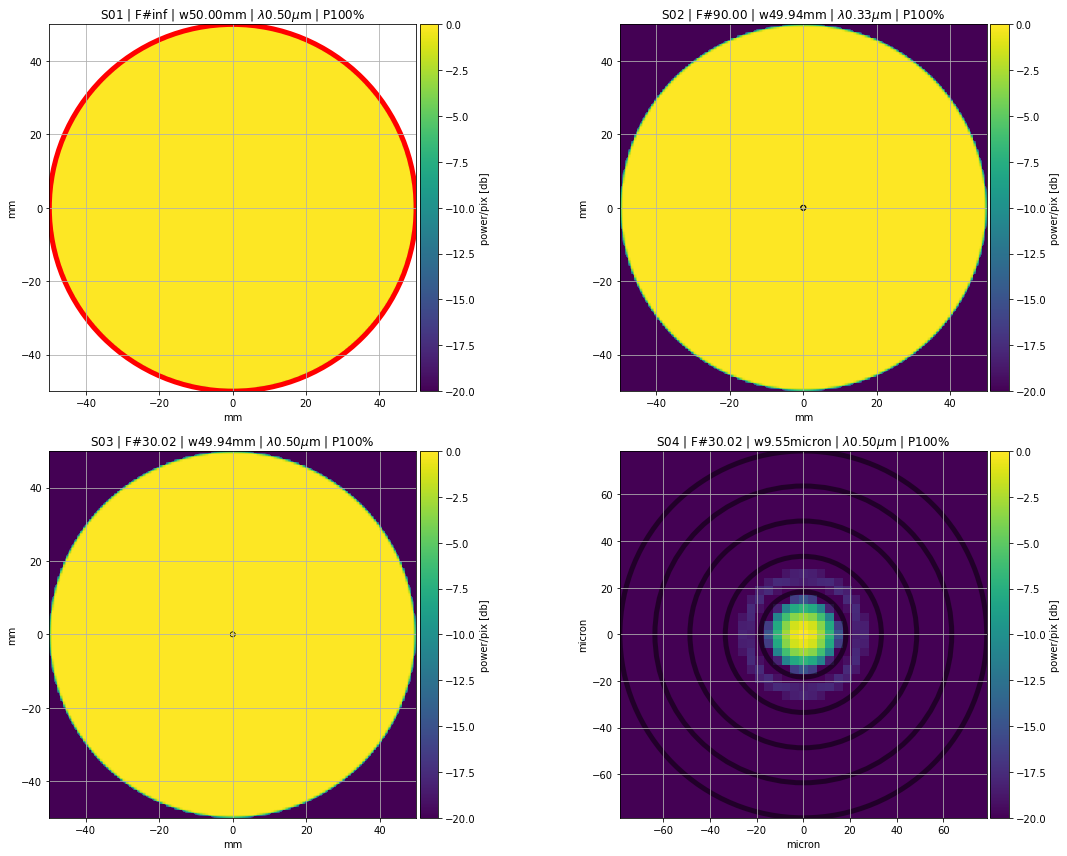

In [7]:
paos.plot_pop(retval, ima_scale='log', ncols=2, figname=None)

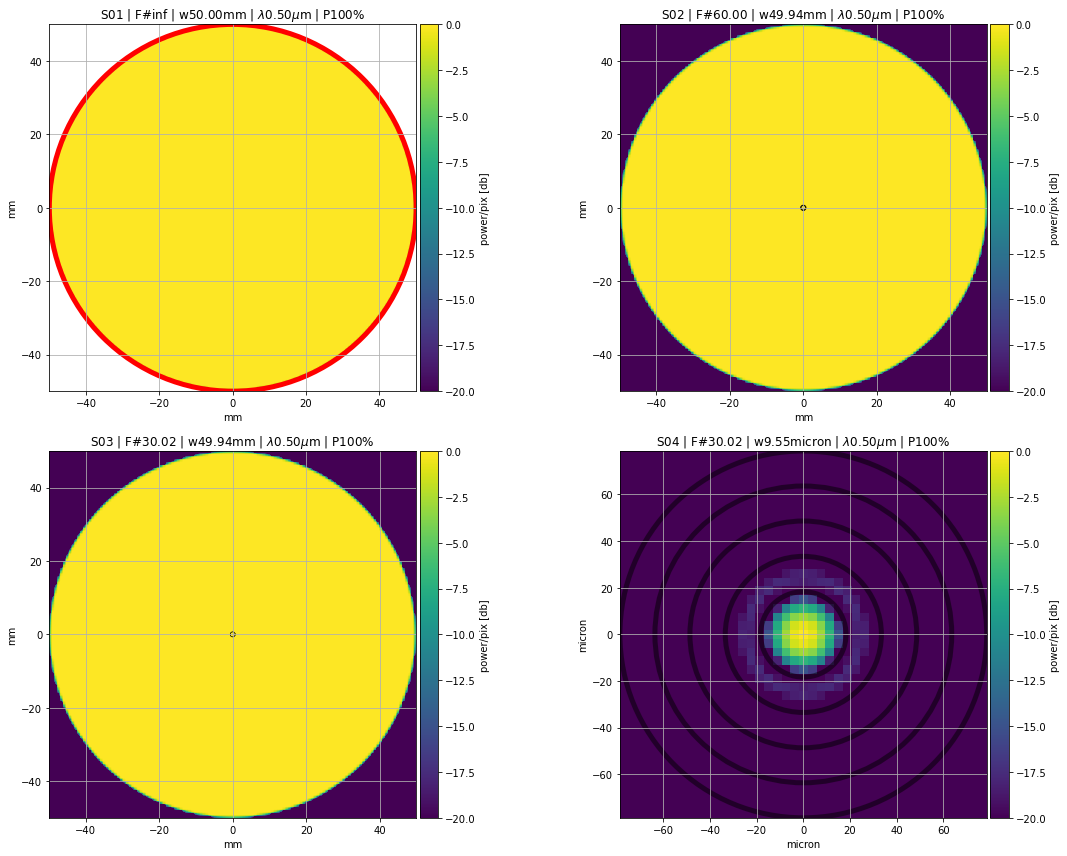

In [8]:
paos.plot_pop(Cretval, ima_scale='log', ncols=2, figname=None)